In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
data_path = "../../data/"

# Attendance

## Weekly cyclicity

In [6]:
df_attendance = pd.read_csv(data_path + "attendance.csv")
df_attendance = df_attendance[["USAGE_DATE", "attendance"]][(df_attendance["FACILITY_NAME"] == "PortAventura World")]
df_attendance["day_of_week"] = pd.to_datetime(df_attendance["USAGE_DATE"]).dt.dayofweek
df_attendance.head()

,USAGE_DATE,attendance,day_of_week
0,2018-06-01,46804,4
2,2018-06-02,57940,5
4,2018-06-03,44365,6
6,2018-06-04,37617,0
8,2018-06-05,32438,1


In [7]:
# Drop negative attendance values
print(f"Before dropping negative attendance values, there are {df_attendance.shape[0]} rows")
df_attendance.drop(df_attendance[df_attendance["attendance"] < 0].index, inplace=True)
print(f"After negative attendance values, there are {df_attendance.shape[0]} rows")

Before dropping negative attendance values, there are 1182 rows
After negative attendance values, there are 1145 rows


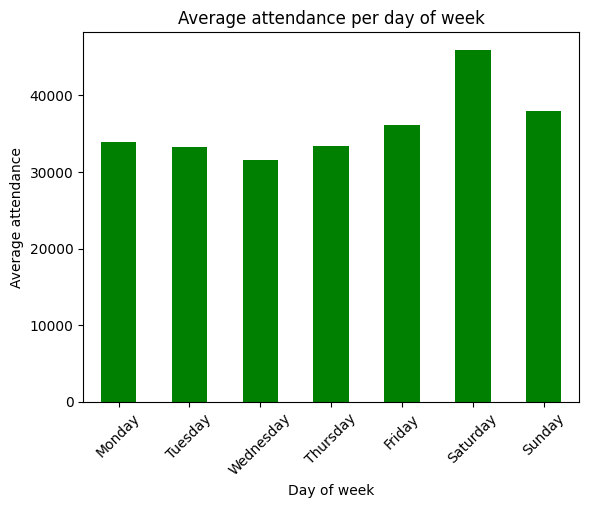

In [11]:
# Group by day of week to then plot the average attendance per day of week
df_attendance.groupby("day_of_week")["attendance"].mean().plot(kind="bar", color="green")
plt.title("Average attendance per day of week")
plt.ylabel("Average attendance")
plt.xlabel("Day of week")
plt.xticks(ticks=np.arange(7), labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], rotation=45)
plt.show()

## Yearly cyclicity

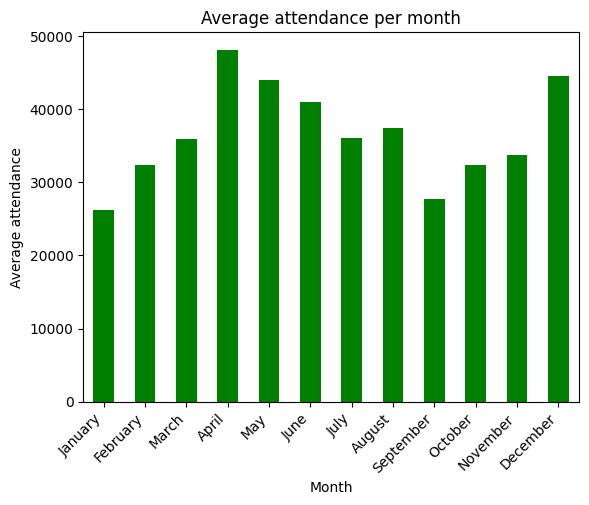

In [10]:
# Let's create a month column and plot the average attendance per month
df_attendance["month"] = pd.to_datetime(df_attendance["USAGE_DATE"]).dt.month
df_attendance.groupby("month")["attendance"].mean().plot(kind="bar", color="green")
plt.title("Average attendance per month")
plt.ylabel("Average attendance")
plt.xlabel("Month")
plt.xticks(ticks=np.arange(12), labels=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], rotation=45, ha="right")
plt.show()

# Waiting times

## Weekly cyclicity

In [13]:
df = pd.read_csv(data_path + "portaventura_world_data.csv")

/var/folders/k7/yjlj1gk15bj1gjrxppqlsy9r0000gn/T/ipykernel_2832/4181415843.py:1: DtypeWarning: Columns (14,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path + "portaventura_world_data.csv")


In [14]:
df.head()

,DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,...,NB_MAX_UNIT,REF_CLOSING_DESCRIPTION,PARK_ATTENDANCE,NIGHT_SHOW,PARADE_1,PARADE_2,temp,humidity,wind_speed,is_holiday
0,2018-01-01,2018-01-01 09:00:00,9,2018-01-01 09:15:00.000,Bumper Cars,5,18.0,108.0000,254.749,254.75,...,18.0,NaN,NaN,NaN,NaN,NaN,6.76,83.0,7.48,True
1,2018-01-01,2018-01-01 09:15:00,9,2018-01-01 09:30:00.000,Bumper Cars,5,18.0,88.9999,254.749,254.75,...,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,2018-01-01,2018-01-01 09:30:00,9,2018-01-01 09:45:00.000,Bumper Cars,5,18.0,93.0001,254.749,254.75,...,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,2018-01-01,2018-01-01 09:45:00,9,2018-01-01 10:00:00.000,Bumper Cars,5,18.0,55.0000,254.749,254.75,...,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,2018-01-01,2018-01-01 10:00:00,10,2018-01-01 10:15:00.000,Bumper Cars,5,18.0,98.0001,254.749,254.75,...,18.0,NaN,NaN,NaN,NaN,NaN,6.77,87.0,7.33,True


In [15]:
# Drop rows with a closed attraction
print(f"Before dropping closed attractions, there are {df.shape[0]} rows")
df.drop(df[~df["REF_CLOSING_DESCRIPTION"].isna()].index, inplace=True)
print(f"After dropping closed attractions, there are {df.shape[0]} rows")

Before dropping closed attractions, there are 2369821 rows
After dropping closed attractions, there are 2215559 rows


In [16]:
# Let's only consider attractions when they are open
print(f"Before dropping attractions when they are closed, there are {df.shape[0]} rows")
df.drop(df[df["OPEN_TIME"] == 0].index, inplace=True)
print(f"After dropping attractions when they are closed, there are {df.shape[0]} rows")

Before dropping attractions when they are closed, there are 2215559 rows
After dropping attractions when they are closed, there are 1289212 rows


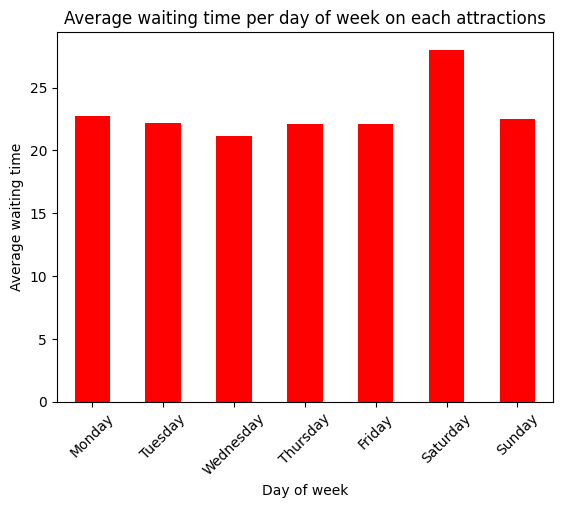

In [19]:
# Now let's group by day of week and plot the average wait time per day of week
df["day_of_week"] = pd.to_datetime(df["DATE"]).dt.dayofweek
df.groupby("day_of_week")["WAIT_TIME_MAX"].mean().plot(kind="bar", color="red")
plt.title("Average waiting time per day of week on each attractions")
plt.ylabel("Average waiting time")
plt.xlabel("Day of week")
plt.xticks(ticks=np.arange(7), labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], rotation=45)
plt.show()

## Yearly cyclicity

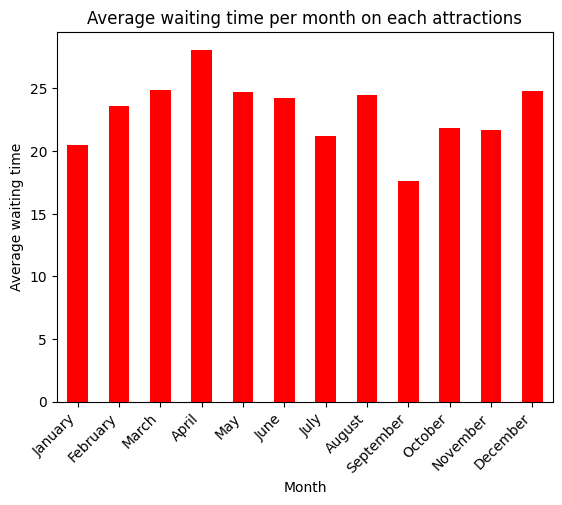

In [20]:
# Let us create a month column and plot the average waiting time per month
df["month"] = pd.to_datetime(df["DATE"]).dt.month
df.groupby("month")["WAIT_TIME_MAX"].mean().plot(kind="bar", color="red")
plt.title("Average waiting time per month on each attractions")
plt.ylabel("Average waiting time")
plt.xlabel("Month")
plt.xticks(ticks=np.arange(12), labels=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], rotation=45, ha="right")
plt.show()